# Outliers Removal Using Interquartile Range (IQR)
- The Interquartile Range (IQR) method is a robust technique to detect and remove outliers. It is based on the middle 50% of the data and is not affected by extreme values, making it a great alternative to Z-score.
- The Interquartile Range (IQR) is the difference between the third quartile (Q3) and the first quartile (Q1):
- IQR=Q3−Q1
- Outliers are defined as:
- Lower Bound: Q1−1.5×IQR
- Upper Bound: Q3+1.5×IQR

### Steps to Remove Outliers Using Python

##### On Basic Data Set

In [31]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a Data Set
# Example dataset
data = {'Value': [10, 12, 14, 15, 16, 18, 19, 20, 100]}  # 100 is an outlier
df = pd.DataFrame(data)

# Display original data
print(df)

Original Data:
   Value
0     10
1     12
2     14
3     15
4     16
5     18
6     19
7     20
8    100


Text(0.5, 1.0, 'Before Removing Outliers')

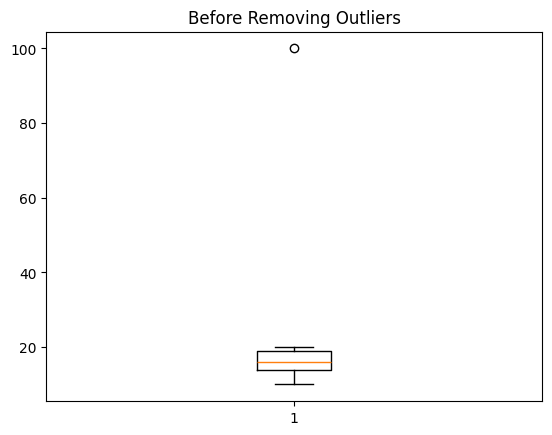

In [12]:
# Before removing outliers
plt.boxplot(df['Value'])
plt.title("Before Removing Outliers")

##### What is a Quartile?
- A quartile is a statistical measure that divides a dataset into four equal parts. These quartiles help us understand the distribution of data by identifying key percentiles.

##### Types of Quartiles
- First Quartile (Q1) - 25th Percentile
- Second Quartile (Q2) - 50th Percentile (Median)
- Third Quartile (Q3) - 75th Percentile
- Interquartile Range (IQR) - IQR = Q3−Q1

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)

# Using Numpy to calculate percentiles
# Q1 = np.percentile(data, 25)
# Q2 = np.percentile(data, 50) 
# Q3 = np.percentile(data, 75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df['Outlier'] = df['Value'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')
print(df)

   Value Outlier
0     10      No
1     12      No
2     14      No
3     15      No
4     16      No
5     18      No
6     19      No
7     20      No
8    100     Yes


In [15]:
# Remove outliers from the dataset
df_cleaned = df[df['Outlier'] == 'No'].drop(columns=['Outlier'])

# Display cleaned data
print(df_cleaned)

   Value
0     10
1     12
2     14
3     15
4     16
5     18
6     19
7     20


Text(0.5, 1.0, 'After Removing Outliers')

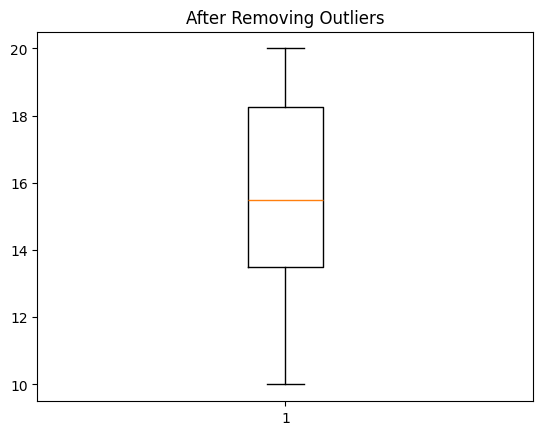

In [17]:
# After removing outliers
plt.boxplot(df_cleaned['Value'])
plt.title("After Removing Outliers")

### On Sales_data

In [22]:
data = pd.read_csv('Sales_data.csv') 
data.head() 

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [23]:
data.isnull().sum()  # Check for missing values

Group                           1401
Customer_Segment                1966
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                    805
dtype: int64

In [25]:
data.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


[]

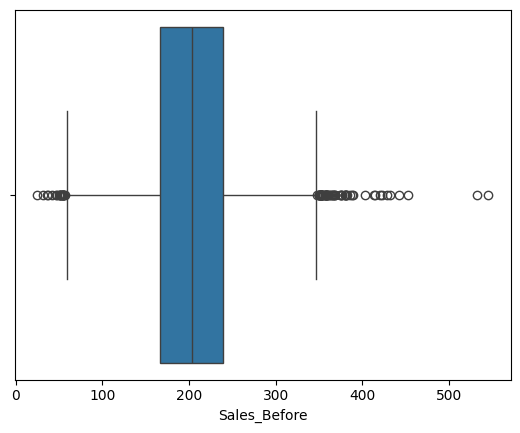

In [34]:
sns.boxplot(x='Sales_Before', data=data)
plt.plot()

[]

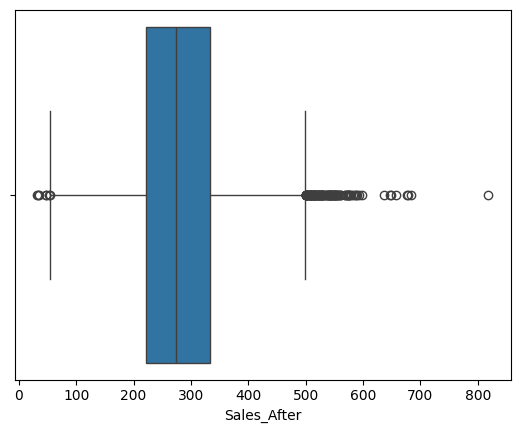

In [35]:
sns.boxplot(x='Sales_After', data=data)
plt.plot()

### ChatGPT Solution

In [47]:
# Compute IQR
Q1 = data['Sales_Before'].quantile(0.25)
Q3 = data['Sales_Before'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}, Q1: {Q1}, Q3: {Q3}")

IQR: 72.17991444070896, Q1: 166.6292324901437, Q3: 238.80914693085265


In [53]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR   # Minimum range/cap for the data
upper_bound = Q3 + 1.5 * IQR   # Maximum range/cap for the data
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 58.35936082908026, Upper Bound: 347.0790185919161


In [49]:
# Identify and remove outliers
data['Outlier'] = data['Sales_Before'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')
data_C = data[data['Outlier'] == 'No'].drop(columns=['Outlier'])
data_C.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


[]

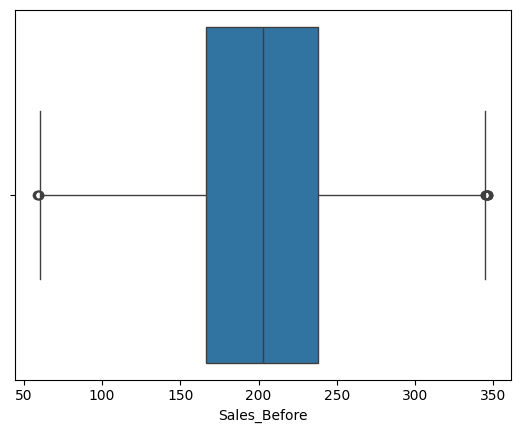

In [51]:
sns.boxplot(x='Sales_Before', data=data_C)
plt.plot()

### Youtube

In [54]:
# Compute IQR
Q1 = data['Sales_After'].quantile(0.25)
Q3 = data['Sales_After'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR: {IQR}, Q1: {Q1}, Q3: {Q3}")

IQR: 111.13311758709892, Q1: 221.43699016965093, Q3: 332.57010775674985


In [89]:
# calculate the range 
min_Range = Q1 - (1.5 * IQR)
max_Range = Q3 - (1.5 * IQR)
print(min_Range, max_Range)

54.73731378900254 165.87043137610146


In [78]:
Data = data[data['Sales_After'] <= max_Range]

[]

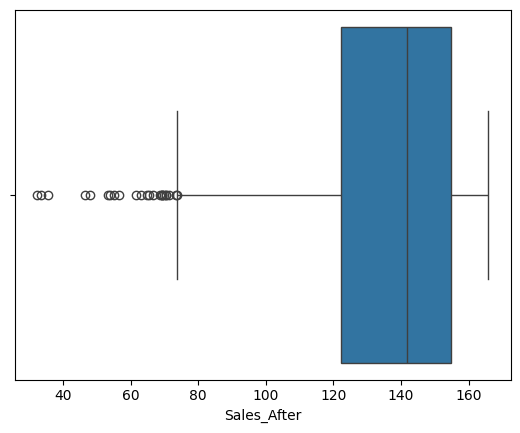

In [79]:
sns.boxplot(x='Sales_After', data=Data)
plt.plot()

In [90]:
Data_C = Data[Data['Sales_After'] > min_Range]

[]

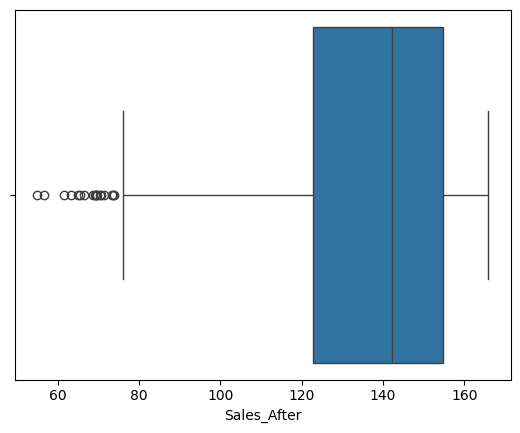

In [91]:
sns.boxplot(x='Sales_After', data=Data_C)
plt.plot()